In [39]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
import domain as dom
import dynad as dyn
from climbasis import *
from dynad import *

In [40]:
outputDir='/home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/'
outputExp='EXP0.1-ESACCI-nan/'

resultsDir=outputDir+outputExp+'MonAnalogs/'
plotsDir=outputDir+outputExp+'Plots/'


In [6]:
sourceData='/home/msantolaria/Documents/Data/'

In [115]:
imon=1
fmon=12
ouputVarName='dyntot'
iyr=1990
fyr=2010
rmon=1

months=['01','02','03','04','05','06','07','08','09','10','11','12']
monthName='mon'+months[rmon-1]

Na= 10 #80
Ns= 7#40
Nr= 2

member='obs'

In [116]:
##SLP----------------------------
dataX='hadslp2'
filenameX = 'slp.mon_hadslp2_newtime_185001-201912.nc'
sourceDataX=sourceData+'HadSLP2/'
variableX='slp'

dsX = xr.open_dataset(sourceDataX+filenameX)[variableX]
domainX='MA'
#dsX=ds0X.sel(time=~ds0X.get_index("time").duplicated()) ## HadSLP2 has double definition time in some dates, e.x 1975-07ds

unitsX='hPa'

fieldX=dom.field_dom(dsX.sel(time=slice(str(iyr)+"-"+str(imon), str(fyr)+"-"+str(fmon))),domainX)

ylatX=fieldX.coords['latitude']
xlonX=fieldX.coords['longitude']
#fieldX=dom.field_dom(dsX,domain)
print('fieldX shape',fieldX.shape)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130
fieldX shape (252, 9, 17)


In [117]:
domainY='HMA'
dataY='esacci'
fileNameY='ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled_icefilled_montlhy_1982-2014.nc'
sourceDataY=sourceData+'ESACCI/'
variableY='snc'
dsY = xr.open_dataset(sourceDataY+fileNameY)[variableY]
unitsY='%'
#print(ds0Y.units,'to',unitsY)


fieldY=dom.field_dom(dsY.sel(time=slice(str(iyr)+"-"+str(imon), str(fyr)+"-"+str(fmon))),domainY)
ylatY=fieldY.coords['lat']
xlonY=fieldY.coords['lon']


print('fieldY shape',fieldY.shape)

HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Domain;latS,latN,lonW,lonE: HMA 20 45 60 110
fieldY shape (252, 500, 1000)


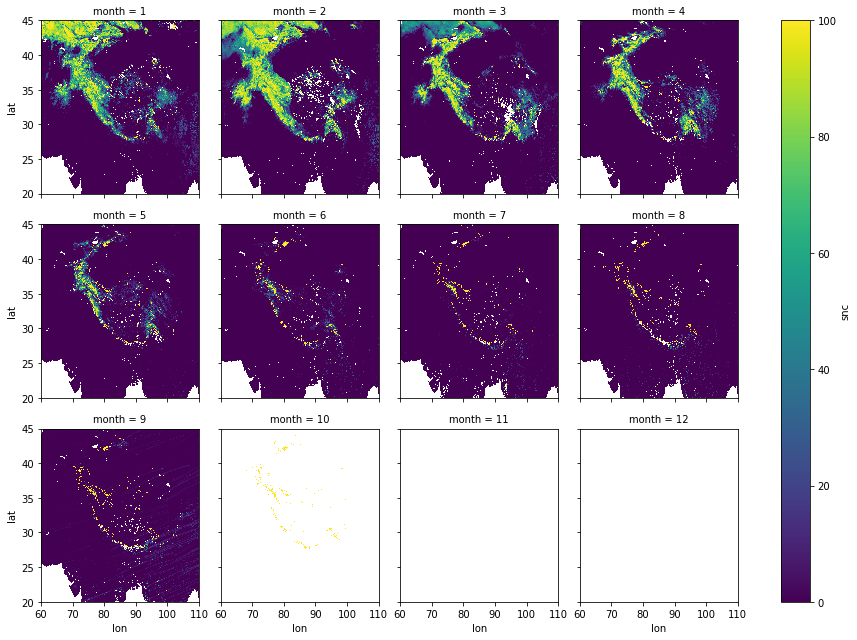

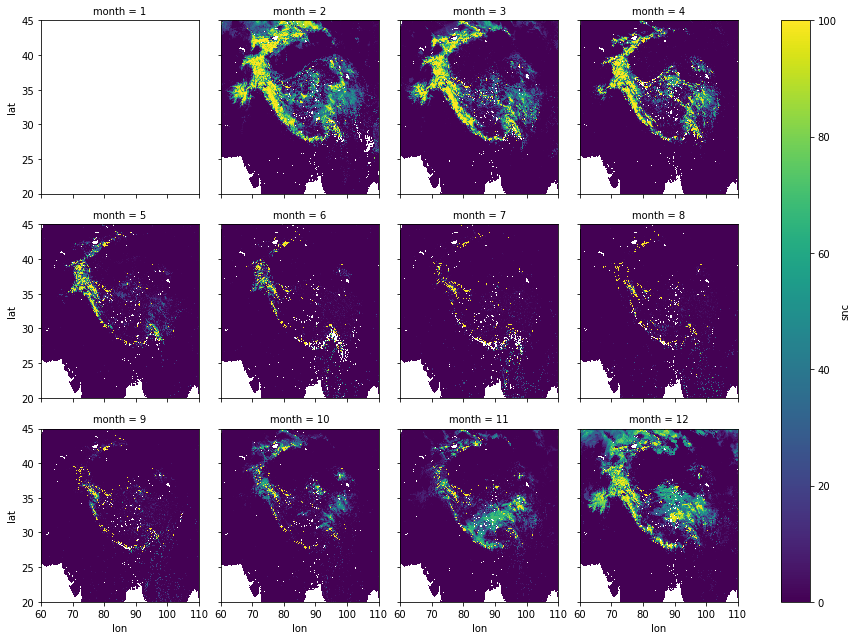

In [118]:
##PROBLEM
fieldY.sel(time='1994').groupby('time.month').mean('time').plot(col='month',col_wrap=4)
fieldY.sel(time='1995').groupby('time.month').mean('time').plot(col='month',col_wrap=4)

In [119]:
fieldXdrop = fieldX.sel(time=slice('1994-10', '1995-01'))
#print(fieldXdrop)
fieldYdrop = fieldY.sel(time=slice('1994-10', '1995-01'))

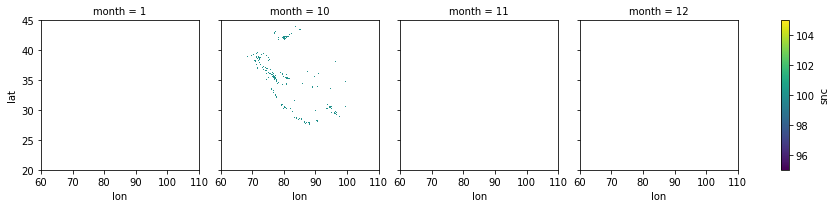

In [120]:
fieldYdrop.groupby('time.month').mean('time').plot(col='month',col_wrap=4)

In [122]:

### Monthly selection for historical fields----------------
valsX,anomsX=climb.monthly_selection(fieldX,rmon)
valsY,anomsY=climb.monthly_selection(fieldY,rmon)

print('anomsX shape',anomsX.shape,'anomsY',anomsY.shape)


anomsX shape (21, 9, 17) anomsY (21, 500, 1000)


In [123]:
monthlyValuesX=anomsX.values
monthlyValuesY=anomsY.values

In [124]:
year=1991
rmon=1

In [125]:
#def climAnalogs_2fields(monthlyValuesX,monthlyValuesY,year,Na,Ns,Nr,iyr,fyr,uncertainty=False):
#"FieldX and FieldY are monthly fields from which to built the analogsto improve and put the original ds"
print('Compute climate analogs of month',year,'over period',iyr,'-',fyr)
print(Na,Ns,Nr,iyr,fyr)
print(" I.- Preparing the data for computation : matrix form time x m (m=nlatxnlon) \n ")

datax=monthlyValuesX
#if np.count_nonzero(np.isnan(datax))!=0:
#    print('ERROR: nan values to be masked ')
dx=monthlyValuesX.shape
nlonx=dx[2]
nlatx=dx[1]
ntx=dx[0]
nsx=nlonx*nlatx
X=datax.reshape(ntx,nsx)
print('X shape',X.shape)
##Preparing the data for computation: associated field
datay=monthlyValuesY
#if np.count_nonzero(np.isnan(datay))!=0:
#    print('ERROR: nan values to be masked ')
dy=monthlyValuesY.shape
nlony=dy[2]
nlaty=dy[1]
nty=dy[0]
nsy=nlony*nlaty
Y=datay.reshape(nty,nsy)
#  print("Fields X and Y are in matrix form with dimension: time x m (m=nlatxnlon) \n",'X:',X.shape,'Y:',Y.shape,"\n")
    ###
print('Y shape',Y.shape)

Compute climate analogs of month 1991 over period 1990 - 2010
10 7 2 1990 2010
 I.- Preparing the data for computation : matrix form time x m (m=nlatxnlon) 
 
X shape (21, 153)
Y shape (21, 500000)


In [126]:
##Target field (Xt SLP jan 1979, first element time=0)
# print("II.- Target field \n")
# print("Xt",variable1,season,iyr,'\n')
countYear=year-iyr
print('Year',year)
print('CountYear',countYear)
Xt=X[countYear,0:nsx]
Yt=Y[countYear,0:nsy]


Year 1991
CountYear 1


In [127]:
d = [[1, 3, 4], [2, 4, 4], [3, 4, 5]]

n = [sorted(l)[1:-1] for l in d]

print(n)

[[3], [4], [4]]


In [134]:
nyr=fyr-iyr+1
print("III.- Computing the Euclidean distance between target SLP field",rmon,"/",iyr,"among the monthly fields of all nyr=",nyr,'\n ... \n')
distList=[] ## Contains the values of the euclidean distance (r=2) between jan 1979 and all jan (1980-1998)
orderList=[]

for i in range(nyr):
    tmp=np.linalg.norm(X[countYear,0:nsx]-X[i,0:nsx])
    distList.append(tmp)
    orderList.append(i)
f=list(zip(distList,orderList))
 #   print("List of Euclidean Distance and Year Analog (0=iyr) in ascending order \n(Note: first element of list is =0,distance between target field and itself) \n")
f_order=sorted(f, key=lambda x: x[0]) ## x[0] is distList elements: Ordering monthly fields by ascending order of their Euclidean distance to the target field
#    print('Show first five analogs: list(Euclidean distance, counter)',f_order[0:5],'\n \n')
#    print('Taking closest Na=',Na,'analogs of the list Euc.Dist (1st element removed) \n')
allyears= [x[1] for x in f_order]
if rmon==1 & 1995-iyr in allyears:
    index=allyears.index(1995-iyr)
    print(len(allyears))
    print(index,rmon,'removing')
    allyears.pop(index)
    print(len(allyears))
    years_analogs_counter= allyears[1:Na+1+1] 
    print(len(years_analogs_counter),Na)
elif rmon==10 or rmon==11 or rmon==12:
    index=allyears.index(1994-iyr)
    print(index,rmon,'removing')
    allyears.pop(index)
    years_analogs_counter= allyears[1:Na+1+1] #need to add one more year because of poping one
    print(len(years_analogs_counter),Na)
else:
    years_analogs_counter= allyears[1:Na+1] 
    print(len(years_analogs_counter),Na)
print('Year analogs are selected')
print(np.asarray(years_analogs_counter)+iyr,'\n \n') ##Just to see which real years are the analogs
'''
f_ca=f_order[1:Na+1] #Remove the first field as it is itself with dist=0.0, always in the first position (to improve by removing also the five years aroundm maybe)
allyears=[x[1] for x in f_ca]
if 1995-iyr in allyears:
    print(Na,'more')
    f_ca=[]
    f_order.remove(1995-iyr)
    f_ca=f_order[1:Na+1]
else:
    print('No 1995 analog')

## Taking only the year analogs
years_analogs_counter= [x[1] for x in f_ca] ##x[1] taking the 2nd element of the list (counter), the year analogs
    #type(years_analogs)
print('Year analogs are selected')
print(np.asarray(years_analogs_counter)+iyr,'\n \n') ##Just to see which real years are the analogs
'''

III.- Computing the Euclidean distance between target SLP field 1 / 1990 among the monthly fields of all nyr= 21 
 ... 

21
15 1 removing
20
11 10
Year analogs are selected
[1993 1997 2003 1992 2002 1990 1999 1994 2001 2000 2004] 
 



"\nf_ca=f_order[1:Na+1] #Remove the first field as it is itself with dist=0.0, always in the first position (to improve by removing also the five years aroundm maybe)\nallyears=[x[1] for x in f_ca]\nif 1995-iyr in allyears:\n    print(Na,'more')\n    f_ca=[]\n    f_order.remove(1995-iyr)\n    f_ca=f_order[1:Na+1]\nelse:\n    print('No 1995 analog')\n\n## Taking only the year analogs\nyears_analogs_counter= [x[1] for x in f_ca] ##x[1] taking the 2nd element of the list (counter), the year analogs\n    #type(years_analogs)\nprint('Year analogs are selected')\nprint(np.asarray(years_analogs_counter)+iyr,'\n \n') ##Just to see which real years are the analogs\n"

In [109]:
allyears=[x[1] for x in f_order]
if 1995-iyr in allyears:
    index=allyears.index(1995-iyr)
    print(index)
    allyears.pop(index)
print(allyears)   

9
[1, 3, 7, 2, 0, 9, 4, 10, 8, 6]


In [105]:
alldistances.pop(9)

48.813793

In [77]:
f_order

[(0.0, 1),
 (15.040936, 3),
 (18.259039, 7),
 (20.524332, 2),
 (23.15405, 0),
 (27.284937, 9),
 (27.955378, 4),
 (30.174923, 10),
 (40.86983, 8),
 (48.813793, 5),
 (64.710724, 6)]

In [83]:
1995-iyr

5

In [88]:
5 in years_analogs_counter


True

In [81]:
[x[1] for x in f_order]

[1, 3, 7, 2, 0, 9, 4, 10, 8, 5, 6]

In [70]:
np.asarray(years_analogs_counter)+iyr

array([1993, 1997, 1992, 1990, 1999, 1994, 2000, 1998, 1995, 1996])

In [ ]:
##Here is where I can remove 1995 if rmon is 1

In [36]:
print('IV.- Construction column vector of selected Na analogs for X and Y with Na x 1 dimension \n \n')
    ##Constructing column vector of slected Na analogs for X and Y
Xc_colVector_Na=[]
Yc_colVector_Na=[]
for i in years_analogs_counter:
    tmp1=X[int(i),0:nsx]
    tmp2=Y[int(i),0:nsy]
    Xc_colVector_Na.append(tmp1)
    Yc_colVector_Na.append(tmp2)
 #   print(len(Xc_colVector_Na),len(Yc_colVector_Na),'\n \n')


IV.- Construction column vector of selected Na analogs for X and Y with Na x 1 dimension 
 



In [42]:
print('V.-  Resample randomly Ns analogs from Na (col vector Ns x 1 ). Do this process Nr times \n \n')
#Pass the list to the first argument and the number of elements you want to get to the second argument. A list is returned
Ns=Ns
Nr=Nr
# print('Ns:',Ns,'Nr:',Nr,'\n \n')
Xc_colVector_Ns_Nr=[]
Yc_colVector_Ns_Nr=[]
for i in range(Nr):
    Xc_colVector_Ns,Yc_colVector_Ns=zip(*random.sample(list(zip(Xc_colVector_Na, Yc_colVector_Na)), Ns))
    Xc=np.asarray(Xc_colVector_Ns)
    Yc=np.asarray(Yc_colVector_Ns)
    #Compute the (Moore-Penrose) pseudo-inverse of a matrix to get beta
    pseudoMP=np.linalg.pinv(Xc.T) # Dimension of matrix Xc are opposite (only by construction of code, algebra doesn't change)
    beta=np.dot(pseudoMP,Xt)
    Xca=np.dot(Xc.T,beta)
    ## Beta coefficients are applied to Ns Y patterns
    Yca=np.dot(Yc.T,beta)
    Xc_colVector_Ns_Nr.append(Xca)
    Yc_colVector_Ns_Nr.append(Yca)

Xc_colVector_Ns_Nr_mean=np.mean(np.asarray(Xc_colVector_Ns_Nr),axis=0) ##Xc_colVector_Ns_Nr.shape =(Nr,Ns,nsx)
Yc_colVector_Ns_Nr_mean=np.mean(np.asarray(Yc_colVector_Ns_Nr),axis=0) ##Xc_colVector_Ns_Nr.shape =(Nr,Ns,nsx)

Xca_avg=np.asarray(Xc_colVector_Ns_Nr_mean)
Yca_avg=np.asarray(Yc_colVector_Ns_Nr_mean)

Xca_Nr=np.asarray(Xc_colVector_Ns_Nr)
Yca_Nr=np.asarray(Yc_colVector_Ns_Nr)




V.-  Resample randomly Ns analogs from Na (col vector Ns x 1 ). Do this process Nr times 
 



In [44]:
print('VI.- Finally, convert them to a nlatxnlon grid. \n \n Return: Xh, Yh (nlatxnlon) mon',rmon,'year',year,'analogs')
Xh=Xca_avg.reshape(nlatx,nlonx)
Yh=Yca_avg.reshape(nlaty,nlony)

Xh_Nr=Xca_Nr.reshape(Nr,nlatx,nlonx)
Yh_Nr=Yca_Nr.reshape(Nr,nlaty,nlony)
#if uncertainty==True:
#     return Xh,Yh,Xh_Nr,Yh_Nr
#else:
#     return Xh,Yh

VI.- Finally, convert them to a nlatxnlon grid. 
 
 Return: Xh, Yh (nlatxnlon) mon 1 year 1991 analogs


mon 1 year 1991


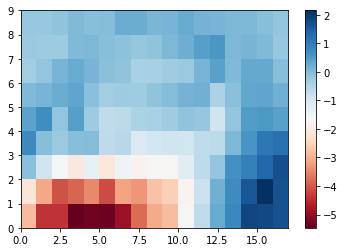

In [54]:
##Let's compare field
print('mon',rmon,'year',year)
plt.pcolormesh(Xh,cmap='RdBu')
plt.colorbar()

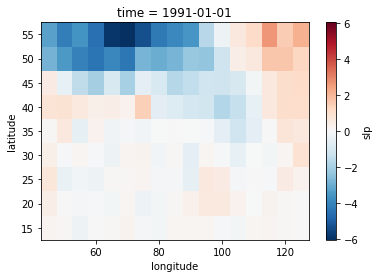

In [53]:
anomsX.sel(time=str(rmon)+'-'+str(year)).plot()

mon 1 year 1991


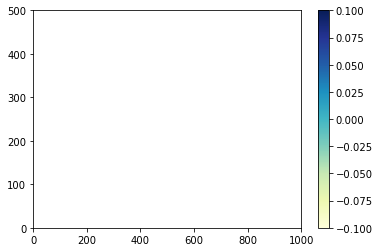

In [55]:
##Let's compare field
print('mon',rmon,'year',year)
plt.pcolormesh(Yh,cmap='YlGnBu')
plt.colorbar()

In [13]:

XhList_years=[]
YhList_years=[]

XhList_Nr_years=[]
YhList_Nr_years=[]

for year in np.arange(iyr,fyr+1,1):
    Xh,Yh,Xh_Nr,Yh_Nr=dyn.climAnalogs_2fields(anomsX.values,anomsY.values,year,Na,Ns,Nr,iyr,fyr,uncertainty=True)
    XhList_years.append(Xh)
    YhList_years.append(Yh)
    XhList_Nr_years.append(Xh_Nr)
    YhList_Nr_years.append(Yh_Nr)
    



Compute climate analogs of month 1990 over period 1990 - 2000
10 7 2 1990 2000
(11, 153)
Year 1990
CountYear 0
Year analogs are selected
[1999 1991 1998 1994 2000 1993 1995 1997 1992 1996] 
 

Compute climate analogs of month 1991 over period 1990 - 2000
10 7 2 1990 2000
(11, 153)
Year 1991
CountYear 1
Year analogs are selected
[1993 1997 1992 1990 1999 1994 2000 1998 1995 1996] 
 

Compute climate analogs of month 1992 over period 1990 - 2000
10 7 2 1990 2000
(11, 153)
Year 1992
CountYear 2
Year analogs are selected
[1993 1991 1997 1994 1990 1999 2000 1998 1995 1996] 
 

Compute climate analogs of month 1993 over period 1990 - 2000
10 7 2 1990 2000
(11, 153)
Year 1993
CountYear 3
Year analogs are selected
[1992 1991 1997 1990 2000 1994 1999 1998 1995 1996] 
 

Compute climate analogs of month 1994 over period 1990 - 2000
10 7 2 1990 2000
(11, 153)
Year 1994
CountYear 4
Year analogs are selected
[1999 1990 1991 1997 1998 1993 2000 1992 1995 1996] 
 

Compute climate analogs of month 19

In [41]:
Xh_year=np.asarray(XhList_years)
print(Xh_year.shape)

Yh_year=np.asarray(YhList_years)
print(Yh_year.shape)


Xh_Nr_years=np.asarray(XhList_Nr_years)
print(Xh_Nr_years.shape)

Yh_Nr_years=np.asarray(YhList_Nr_years)
print(Yh_Nr_years.shape)

NameError: name 'XhList_years' is not defined

In [15]:
##Saving monthly field (mon01 1851-20149. NOTE: dims are define 'latitude' and 'longitude'  to facilitate the spatial regrid for model comparison

daX= xr.DataArray(data=Xh_year, dims=["time","latitude", "longitude"],
                  coords=[np.arange(iyr,fyr+1,1),
                fieldX.coords[fieldX.dims[1]].values,
                fieldX.coords[fieldX.dims[2]].values])
daX.name= variableX
daX.attrs['long_name'] = variableX+' analog field-selected domain'
daX.attrs['units'] = unitsX
ofileX='%s.anom.%s_%s_%s_%s_%s_%s_%i_%i_Na%i_Ns%i_Nr%i'%(variableX,ouputVarName,monthName,dataX,exp,member,domainX,iyr,fyr,Na,Ns,Nr)
new_filename_x = resultsDir+ofileX+'.nc'
print ('saving to ', new_filename_x)
daX.to_netcdf(path=new_filename_x)
daX.close()

print ('finished saving')





saving to  /home/maria/Documents/ResearchProjects/HMA-ClimAnalogs/EXP2-ObsOnly/MonAnalogs/slp.anom.dyntot_mon01_hadslp2_hadslp2.slp-esacci.snc_obs_MA_1990_2000_Na10_Ns7_Nr2.nc
finished saving


In [16]:
Yh_year_filled = np.where(np.isnan(Yh_year), 9999, Yh_year)

In [17]:
daY= xr.DataArray(data=Yh_year_filled, dims=["time","latitude", "longitude"],
                  coords=[np.arange(iyr,fyr+1,1),
                fieldY.coords[fieldY.dims[1]].values,
                fieldY.coords[fieldY.dims[2]].values])
daY.name= variableY
daY.attrs['long_name'] = variableY+'analog field'
daY.attrs['units'] = unitsY
ofileY='%s.anom.%s_%s_%s_%s_%s_%s_%i_%i_Na%i_Ns%i_Nr%i'%(variableY,ouputVarName,monthName,dataY,exp,member,domainY,iyr,fyr,Na,Ns,Nr)
new_filename_Y = resultsDir+ofileY+'.nc'
print ('saving to ', new_filename_Y)
daY.to_netcdf(path=new_filename_Y,compute=True)
daY.close()

print ('finished saving')


saving to  /home/maria/Documents/ResearchProjects/HMA-ClimAnalogs/EXP2-ObsOnly/MonAnalogs/snc.anom.dyntot_mon01_esacci_hadslp2.slp-esacci.snc_obs_HMA_1990_2000_Na10_Ns7_Nr2.nc
finished saving


In [18]:


##Residual----
fieldO=dom.field_dom(dsY.sel(time=slice(str(iyr)+"-"+str(imon), str(fyr)+"-"+str(fmon))),domainY)

valsO,anomsO=climb.monthly_selection(fieldO,rmon)


HMA latS,latN,lonW,lonE: slice(20, 45, None) slice(60, 110, None)
Domain;latS,latN,lonW,lonE: HMA 20 45 60 110


In [19]:
anomsO.sel(time='1995')

<xarray.DataArray 'snc' (time: 1, lat: 500, lon: 1000)>
array([[[        nan,         nan,         nan, ..., 18.50091398,
          7.4860454 , 14.15704301],
        [        nan,         nan,         nan, ..., 18.01602151,
         14.05879032, 13.67639785],
        [        nan,         nan,         nan, ..., 24.67245658,
         23.50765095, 20.73727254],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-12-31
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 109.8 109.9 109.9 110.0

In [17]:
anomsO_filled=np.where(np.isnan(anomsO), -9999, anomsO)

In [18]:
ana='/home/maria/Documents/ResearchProjects/HMA-ClimAnalogs/EXP2-ObsOnly/MonAnalogs/snc.anom.dyntot_mon01_esacci_hadslp2.slp-esacci.snc_obs_HMA_1990_2000_Na10_Ns7_Nr2.nc'

In [19]:
dsD=xr.open_dataset(ana)['snc']

In [20]:
np.max(dsD)

<xarray.DataArray 'snc' ()>
array(9999.)

In [21]:
dsR=anomsO_filled-dsD.values

In [22]:
np.max(dsR)

-9909.0

In [23]:
np.min(dsR)

-19998.0

In [33]:
dsRnan=np.where(abs(dsR) > 1000, np.nan, dsR)

In [34]:
np.isnan(dsRnan).all()

True

In [20]:

substraction=np.zeros((anomsO.shape))